In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/0.MKCE/Datasets/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus=[]

In [ ]:
for i in range(0,1000):
  review=re.sub('[^a-zA-z]',' ',df['Review'][i])
  review=review.lower()
  review=review.split()
  ps=PorterStemmer()
  review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)
  

In [ ]:
#create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)

In [ ]:
x=cv.fit_transform(corpus).toarray()
y=df['Liked'].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
#LogisticRegression

# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#prediction
y_pred=model.predict(x_test)

In [ ]:
#predicting the occurances of  probabilitiess for the data
model.predict_proba(x_test)

array([[9.94572260e-01, 5.42773953e-03],
       [9.66104830e-01, 3.38951704e-02],
       [9.81640723e-01, 1.83592771e-02],
       [9.99775211e-01, 2.24788510e-04],
       [9.58333617e-01, 4.16663829e-02],
       [7.94623183e-01, 2.05376817e-01],
       [1.14335864e-05, 9.99988566e-01],
       [9.30264062e-01, 6.97359380e-02],
       [9.93498006e-01, 6.50199352e-03],
       [1.13880230e-02, 9.88611977e-01],
       [6.59340721e-01, 3.40659279e-01],
       [1.57871778e-02, 9.84212822e-01],
       [5.62806955e-01, 4.37193045e-01],
       [1.45625649e-02, 9.85437435e-01],
       [1.34189174e-02, 9.86581083e-01],
       [5.66102337e-06, 9.99994339e-01],
       [1.49529878e-01, 8.50470122e-01],
       [6.86894073e-01, 3.13105927e-01],
       [9.99626990e-01, 3.73010075e-04],
       [4.49887206e-02, 9.55011279e-01],
       [9.46073109e-01, 5.39268906e-02],
       [6.95289970e-01, 3.04710030e-01],
       [3.24158750e-02, 9.67584125e-01],
       [4.97585686e-01, 5.02414314e-01],
       [4.862087

In [ ]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.728

In [ ]:
#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[89, 28],
       [40, 93]])

In [ ]:
#Classification Report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       117
           1       0.77      0.70      0.73       133

    accuracy                           0.73       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.73      0.73      0.73       250



In [ ]:
#Unsupervised learning 
# Importing Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


In [ ]:
#K-Means Clustering
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)

In [ ]:
#fit the k-means model
km.fit_predict(x)

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Calculate Silhoutte Score
score = silhouette_score(x, km.labels_, metric='euclidean')

In [ ]:
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.030


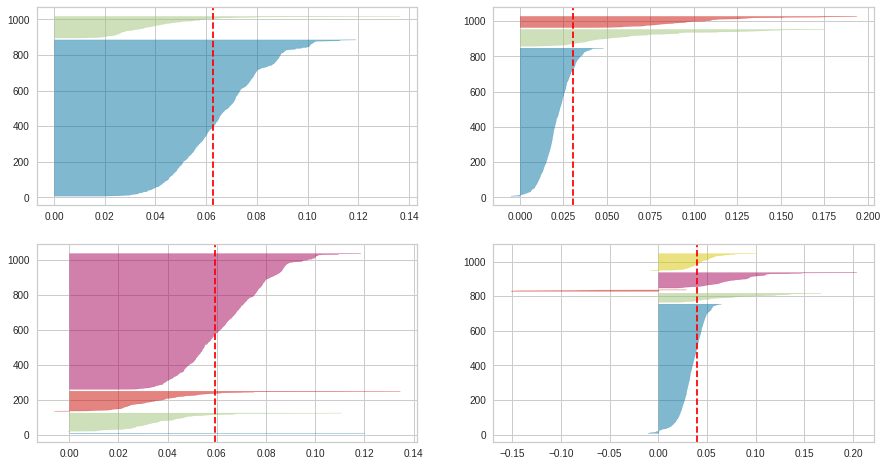

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

In [ ]:
# SVM Classifier
#fiting svm to the training set
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',probability= True, random_state=0)
classifier.fit(x_train,y_train)

SVC(probability=True, random_state=0)

In [ ]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [ ]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.728

In [ ]:
#making confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 79,  38],
       [ 30, 103]])

In [ ]:
#classification report
z=classification_report(y_test,y_pred)
print(z) 

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       117
           1       0.73      0.77      0.75       133

    accuracy                           0.73       250
   macro avg       0.73      0.72      0.73       250
weighted avg       0.73      0.73      0.73       250



In [ ]:
#for computing Receiver operating characteristics
from sklearn.metrics import roc_curve
#for computing area under curve
from sklearn.metrics import roc_auc_score

In [ ]:
#visualizing the ROC-AUC curve
y_proba=classifier.predict_proba(x_test)

#we take the predicted values of class 1
y_predicted=y_proba[:,1]

#we check to see if the right values have been considered from the predicted values
print(y_predicted)

[0.14449043 0.31531822 0.43290671 0.19647259 0.11290079 0.76077522
 0.77451847 0.1954897  0.09572283 0.93655594 0.33970079 0.80392473
 0.74838336 0.8746828  0.94858237 0.95280941 0.57315616 0.2183381
 0.14525034 0.79583878 0.43832127 0.21123639 0.93548158 0.60340258
 0.32118801 0.45649081 0.64821731 0.94337253 0.98897844 0.52245699
 0.66087443 0.543503   0.62130386 0.44134731 0.94413146 0.45167041
 0.24916802 0.30918004 0.31310865 0.97311168 0.79940932 0.72506957
 0.77458228 0.09737385 0.19483533 0.09222757 0.61676853 0.77725568
 0.28617597 0.30463614 0.83904548 0.66671139 0.79913678 0.95959637
 0.37526969 0.32098198 0.71814672 0.58270867 0.14516896 0.81061651
 0.67422668 0.11949017 0.58162577 0.83511314 0.86105662 0.37779583
 0.71625152 0.31000588 0.41363452 0.24469703 0.67933599 0.93738881
 0.81570665 0.76294027 0.40228993 0.3925639  0.75662256 0.29271924
 0.12173597 0.87980441 0.41006129 0.58906746 0.76186623 0.1888574
 0.82441124 0.6731336  0.26864619 0.40694827 0.9691974  0.859203

In [ ]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [ ]:
#passing the fpr&tpr values to auc()to calculate the area under curve
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.8088169140800721


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

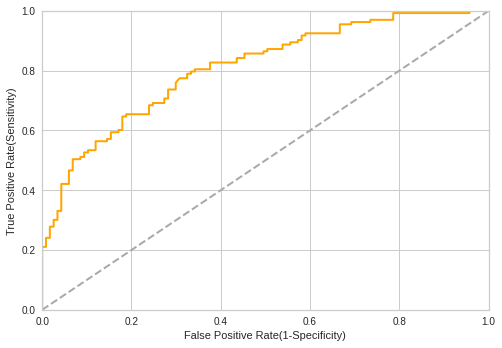

In [ ]:
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')


In [ ]:
#K-NN classifier
#Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [ ]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.616

In [ ]:
#making confusion matrix
confusion_matrix(y_test,y_pred)

array([[88, 29],
       [67, 66]])

In [ ]:
#classification report
z=classification_report(y_test,y_pred)
print(z) 

              precision    recall  f1-score   support

           0       0.57      0.75      0.65       117
           1       0.69      0.50      0.58       133

    accuracy                           0.62       250
   macro avg       0.63      0.62      0.61       250
weighted avg       0.64      0.62      0.61       250



In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
#Fitting
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#prediction
y_pred=model.predict(x_test)

In [ ]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.672

In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[87, 30],
       [52, 81]])

In [ ]:
#Classification Report
z=classification_report(y_test,y_pred)
print(z)

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       117
           1       0.73      0.61      0.66       133

    accuracy                           0.67       250
   macro avg       0.68      0.68      0.67       250
weighted avg       0.68      0.67      0.67       250



In [ ]:
#for computing Receiver operating characteristics
from sklearn.metrics import roc_curve
#for computing area under curve
from sklearn.metrics import roc_auc_score

In [ ]:
#visualizing the ROC-AUC curve
y_proba=classifier.predict_proba(x_test)

#we take the predicted values of class 1
y_predicted=y_proba[:,1]

#we check to see if the right values have been considered from the predicted values
print(y_predicted)

[0.4 0.6 0.4 0.4 0.4 0.6 0.8 0.4 0.  0.8 0.2 0.8 0.6 0.4 0.6 1.  0.4 0.2
 0.2 0.4 0.2 0.6 0.6 0.4 0.4 0.8 0.2 1.  0.6 0.4 0.4 0.4 0.4 0.6 0.6 0.4
 0.4 0.4 0.2 1.  0.4 0.6 0.4 0.2 0.  0.2 0.6 0.6 0.6 0.4 0.2 0.6 0.6 0.6
 0.4 0.  0.4 0.4 0.2 0.4 0.4 0.2 0.6 0.4 0.4 0.6 0.6 0.4 0.4 0.4 1.  0.6
 0.4 0.6 0.6 0.6 0.4 0.4 0.2 0.6 0.4 0.6 0.2 0.4 0.6 0.6 0.4 0.2 0.6 0.4
 0.2 0.4 0.4 0.6 0.4 0.4 0.4 0.4 0.2 0.6 0.4 0.2 0.6 0.6 0.4 0.4 0.6 0.8
 0.4 0.6 0.4 0.2 0.4 0.4 0.6 0.2 0.4 0.4 0.8 0.6 0.4 0.4 0.8 0.4 0.4 0.4
 0.6 0.6 0.2 0.4 0.4 0.6 0.4 0.2 0.4 0.8 0.4 0.8 0.4 0.4 0.  0.8 0.4 0.4
 0.4 0.4 0.  0.2 0.4 0.6 0.4 0.4 0.6 0.6 0.6 0.4 0.8 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.6 0.2 0.6 0.4 0.  0.2 0.4 0.6 0.6 0.4 0.4 0.4 0.  0.6 0.4 0.2
 0.8 0.6 0.2 0.4 0.4 0.4 0.4 0.4 0.4 0.6 0.4 0.2 0.4 0.6 0.6 0.4 0.6 0.6
 0.4 0.4 0.6 0.8 0.6 0.6 0.4 0.6 0.8 0.6 0.  0.4 0.4 0.4 0.2 0.4 0.8 0.6
 0.4 0.8 0.4 0.6 0.4 0.2 0.2 0.6 0.8 0.8 0.4 0.4 0.6 0.4 0.2 0.6 0.4 0.4
 0.8 0.4 0.4 0.6 0.6 0.6 0.4 1.  0.4 0.8 0.2 0.6 0.

In [ ]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [ ]:
#passing the fpr&tpr values to auc()to calculate the area under curve
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.670908039329092


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

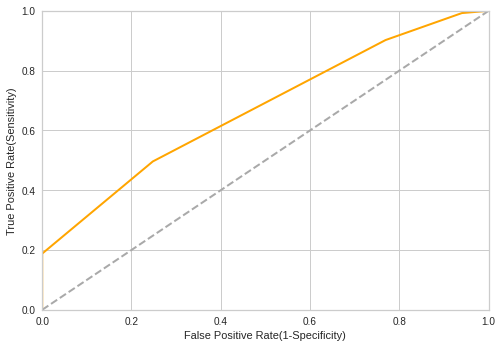

In [ ]:
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')


In [ ]:
#fitting random forest classification to the training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [ ]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.68

In [ ]:
#making confusion matrix
confusion_matrix(y_test,y_pred)

array([[103,  14],
       [ 66,  67]])

In [ ]:
#classification report
z=classification_report(y_test,y_pred)
print(z) 

              precision    recall  f1-score   support

           0       0.61      0.88      0.72       117
           1       0.83      0.50      0.63       133

    accuracy                           0.68       250
   macro avg       0.72      0.69      0.67       250
weighted avg       0.73      0.68      0.67       250

